In [21]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Import cleaned datset

In [22]:
df = pd.read_csv('/config/workspace/Dataset/Algerian_forest_fires_CLEANED_dataset.csv')

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Train Test Split

In [24]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [25]:
# not fire -> 0 and fire - > 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [26]:
df['Classes']

0      1
1      1
2      1
3      1
4      1
      ..
238    1
239    1
240    1
241    1
242    1
Name: Classes, Length: 243, dtype: int64

In [27]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [28]:
## separate datset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((182, 11), (61, 11))

# FEATURE SELECTION

In [29]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.204068,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.150118,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.090066,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.607844,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.272161,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.086620,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.094095,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.113483,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.090411,0.079373
Classes,0.204068,-0.150118,-0.090066,-0.607844,0.272161,0.086620,0.094095,0.113483,0.090411,1.000000,0.103117


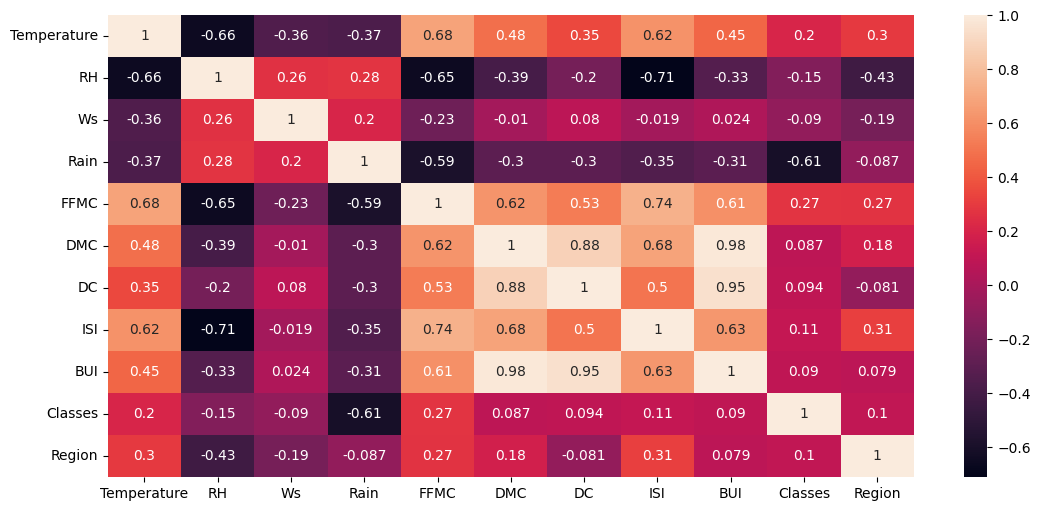

In [30]:
# plotting corr
plt.figure(figsize=(13,6))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [31]:
def correlation(dataset,threshold):
    col_corr =set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [32]:
corr_features = correlation(X_train,0.85)

In [33]:
corr_features

{'BUI', 'DC'}

In [34]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [35]:
print(X_train)

     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
230           36  33  13   0.1  90.6  25.8   9.0        1       1
218           34  71  14   6.5  64.5   3.3   1.0        1       1
184           39  33  17   0.0  93.7  17.1  17.2        1       1
233           35  34  17   0.0  92.2  23.6  13.8        1       1
204           36  43  16   0.0  91.2  46.1  11.5        1       1
..           ...  ..  ..   ...   ...   ...   ...      ...     ...
67            32  69  16   0.0  86.5  15.5   5.5        1       0
192           40  31  15   0.0  94.2  22.5  16.6        1       1
117           31  54  11   0.0  82.0   6.0   2.5        1       0
47            31  68  14   0.0  85.4  12.1   4.6        1       0
172           32  48  18   0.0  91.5  44.2  13.2        1       1

[182 rows x 9 columns]


# Feature Scaling And Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[ 1.01365171, -1.8394432 , -0.88892151, ...,  0.89709937,
         0.10540926,  1.02222494],
       [ 0.47735924,  0.64088224, -0.54024971, ..., -0.91779112,
         0.10540926,  1.02222494],
       [ 1.81809043, -1.8394432 ,  0.50576569, ...,  2.75736213,
         0.10540926,  1.02222494],
       ...,
       [-0.32707948, -0.46873704, -1.58626511, ..., -0.57749915,
         0.10540926, -0.97825827],
       [-0.32707948,  0.44506707, -0.54024971, ..., -0.1010904 ,
         0.10540926, -0.97825827],
       [-0.05893324, -0.86036737,  0.85443749, ...,  1.84991688,
         0.10540926,  1.02222494]])

In [38]:
X_test_scaled

array([[-8.63371954e-01, -2.72921871e-01, -5.40249712e-01,
        -3.63882055e-01,  7.69875468e-01, -2.11276144e-01,
         6.24865799e-01,  1.05409255e-01, -9.78258272e-01],
       [ 1.28179795e+00, -1.64362804e+00, -8.88921512e-01,
        -9.04070350e-02,  5.52497959e-01,  2.11362151e-01,
        -5.57181353e-02,  1.05409255e-01,  1.02222494e+00],
       [ 2.09212999e-01,  4.45067072e-01,  1.20310929e+00,
        -3.63882055e-01,  5.10424892e-01, -2.11276144e-01,
         2.16515438e-01,  1.05409255e-01, -9.78258272e-01],
       [ 1.01365171e+00, -4.03465315e-01, -8.88921512e-01,
        -2.27144545e-01,  2.86035205e-01,  3.13495439e-02,
        -3.05265578e-01,  1.05409255e-01, -9.78258272e-01],
       [-5.89332392e-02, -7.95095648e-01, -1.58626511e+00,
        -3.63882055e-01,  7.76887646e-01, -4.22595292e-01,
         3.98004488e-01,  1.05409255e-01, -9.78258272e-01],
       [ 7.45505476e-01,  1.18708462e-01, -8.88921512e-01,
        -3.63882055e-01,  7.41826757e-01,  5.087742

# Box plots to understand effects of Standard Scaler 

/tmp/ipykernel_2076/3416117291.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

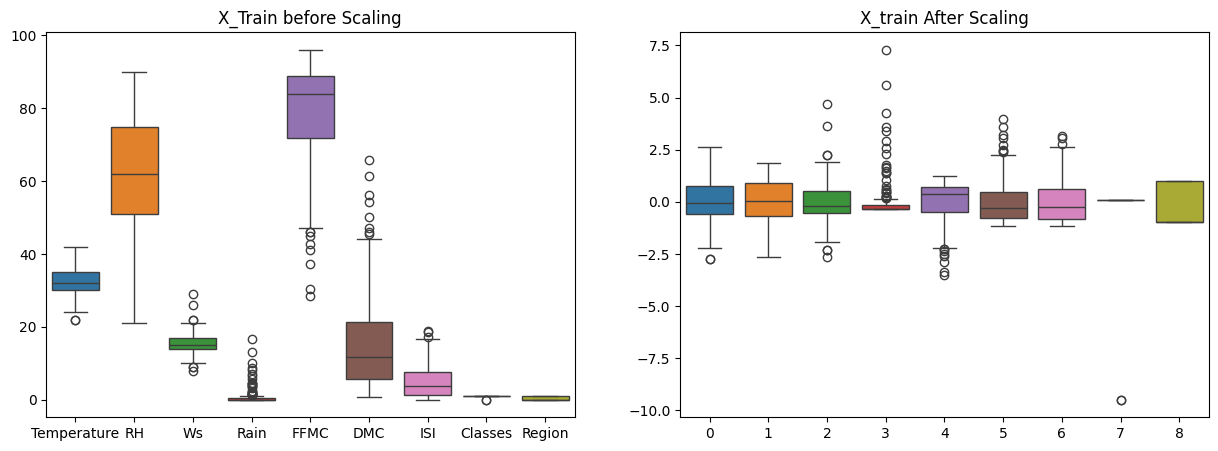

In [39]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train) 
plt.title("X_Train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

# Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error : ",mae)
print("R2 Score : ",score)

mean_absolute_error :  0.6510155116580748
R2 Score :  0.9699844433090705


# Lasso Regression Model

In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error : ",mae)
print("R2 Score : ",score)

mean_absolute_error :  1.1209175798372668
R2 Score :  0.9376608745831527


# Ridge Regression Model

#### Best Regression Model

In [42]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error : ",mae)
print("R2 Score : ",score)

mean_absolute_error :  0.668912197278216
R2 Score :  0.9689634729131473


# Elasticnet Regression Model

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error : ",mae)
print("R2 Score : ",score)

mean_absolute_error :  1.8051335776117747
R2 Score :  0.8600373877680088


# Making Pickle file

In [44]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))